# Time Series

## Vehicular flow by AUSA (Urban Highways Limited Company) toll units

** Find the dataset [here](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). - years 2017, 2018 y 2019.**

For this project we'll use the data from Illia Highway and cash payment. 


### Data Exploration

Look, analyze, study the dataset. Try to answer different questions like, busiest days and times, autocorrelations, resamples, etc.


#### Series Components

1. Calculate the seasonal and trend components of the serie. Interpret the results, if it's necessary with auxiliary information or elements of the dataset that you are not using (example, if the trend is negative, could it be because it was migrated to other forms of payment?).

2. Does the serie have outliers? Interpret.

### Future Prediction

Implement a model that predicts the traffic on the Illia highway for the last quarter of 2019 

1. Data transformations
2. Evalute results
3. Choose a benchmark model
4. Optimize the hyperparameters of the model 
5. Try to answer the following question: What information is the model using to predict?
6. Use the model to predict the traffic in the year 2020. Does it work?
7. Try to add information from previous years (2015, 2016). Does it improve the results?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### So, the years 2017, 2018 y 2019 have the follow information:

**period**: year 

**date**: year, day, month

**start_time** start time of the vehicle count (DROP)

**end_time** end time of the vehicle count (we will use this to take the time)

**day**: day of the week

**station**: toll stations, they differ slightly between years (Dellepiane is unified in 2019, before there was Dellepiane, Liniers and Centro, and PDB is added)

**direction**: Center or Province

**vehicle_type**: Light or Heavy

**payment**: there are several and they vary from year to year

**number_steps**: number of vehicles.

As we said, we'll work with payment "efectivo" and station "Illia"


In [10]:
#Concat the three dataset (they have the same columns)
dataset = pd.concat([data_2019, data_2018, data_2017])


mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Drop the columns we won't use
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


Text(0.5, 1.0, 'Transit according to day of the week')

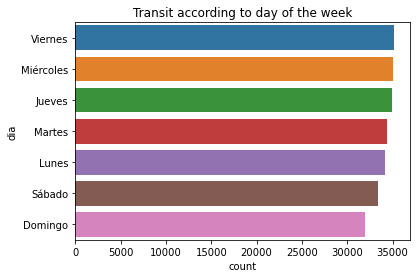

In [11]:
import seaborn as sns

sns.countplot(y = 'dia', data = dataset, order = dataset['dia'].value_counts().index)
plt.title('Transit according to day of the week')

In [12]:
#Busiest days and times
dia_sem = dataset.groupby('dia').sum('cantidad_pasos').sort_values(by='cantidad_pasos', ascending=False)

In [13]:
dia_sem.head(7)

,hora_fin,cantidad_pasos
dia,,
Viernes,417612,7647272
Jueves,414391,7302169
Miércoles,416664,7125526
Martes,408222,6865551
Lunes,405556,6691387
Sábado,391320,6441715
Domingo,382723,5791961


In [14]:
horario = dataset.groupby('hora_fin').sum('cantidad_pasos').sort_values(by='cantidad_pasos', ascending=False)

In [15]:
horario.head(24)

,cantidad_pasos
hora_fin,
18,3115036
19,3071455
14,3005578
17,2993721
16,2969568
15,2933388
13,2907990
12,2729369
20,2661885


Text(0.5, 1.0, 'Type of vehicle')

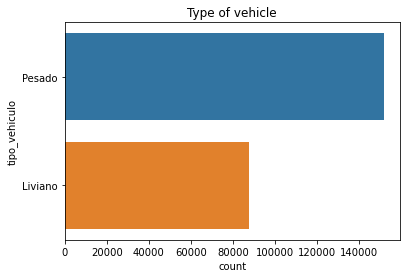

In [17]:
sns.countplot(y = 'tipo_vehiculo', data = dataset, order = dataset['tipo_vehiculo'].value_counts().index) 
plt.title('Type of vehicle')

Text(0.5, 1.0, 'Direction')

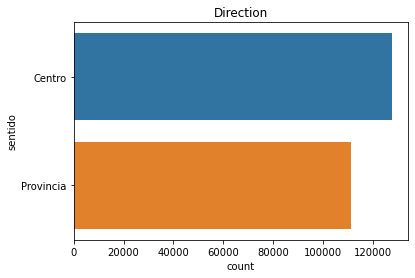

In [18]:
sns.countplot(y = 'sentido', data = dataset, order = dataset['sentido'].value_counts().index)
plt.title('Direction')

In [19]:
#Transform the column "date" and merge with the time
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [20]:
#Correct the name
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [21]:
#Sort values by date
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


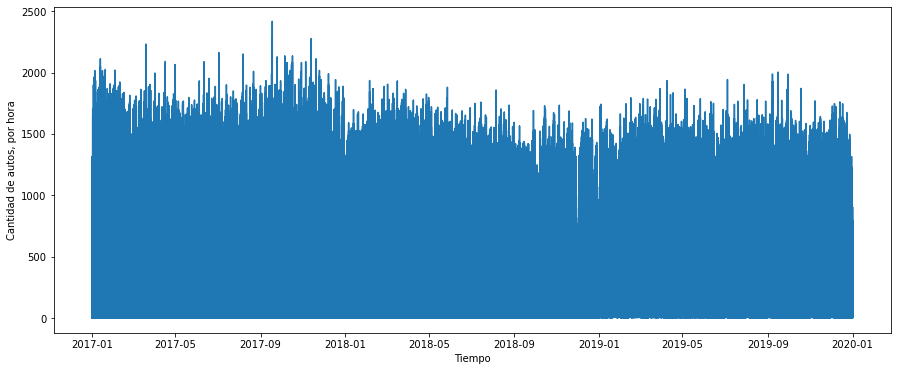

In [22]:
#plot the data
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [23]:
#Resampleample daily
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


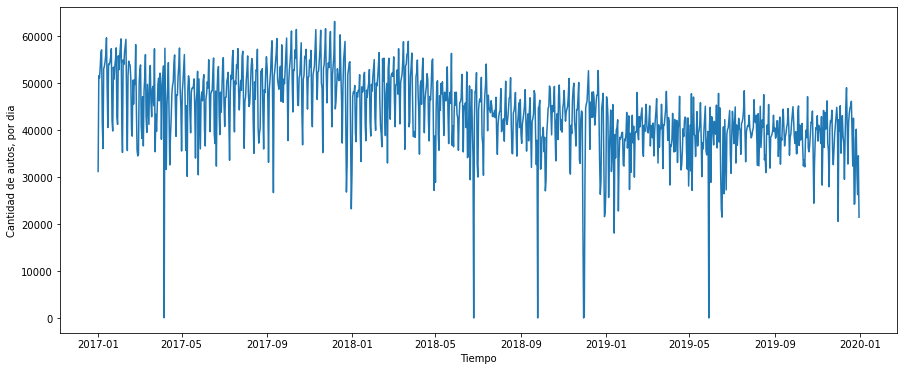

In [24]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [25]:
#Analyze the components
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='additive')
# result.plot()
# pyplot.show()

In [26]:
result.trend

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: trend, Length: 1095, dtype: float64

In [27]:
result.seasonal

fecha
2017-01-01   -6773.858616
2017-01-02   -1139.059538
2017-01-03      87.580093
2017-01-04    1914.998893
2017-01-05    3051.834973
                 ...     
2019-12-27    5279.642666
2019-12-28   -2421.138470
2019-12-29   -6773.858616
2019-12-30   -1139.059538
2019-12-31      87.580093
Freq: D, Name: seasonal, Length: 1095, dtype: float64

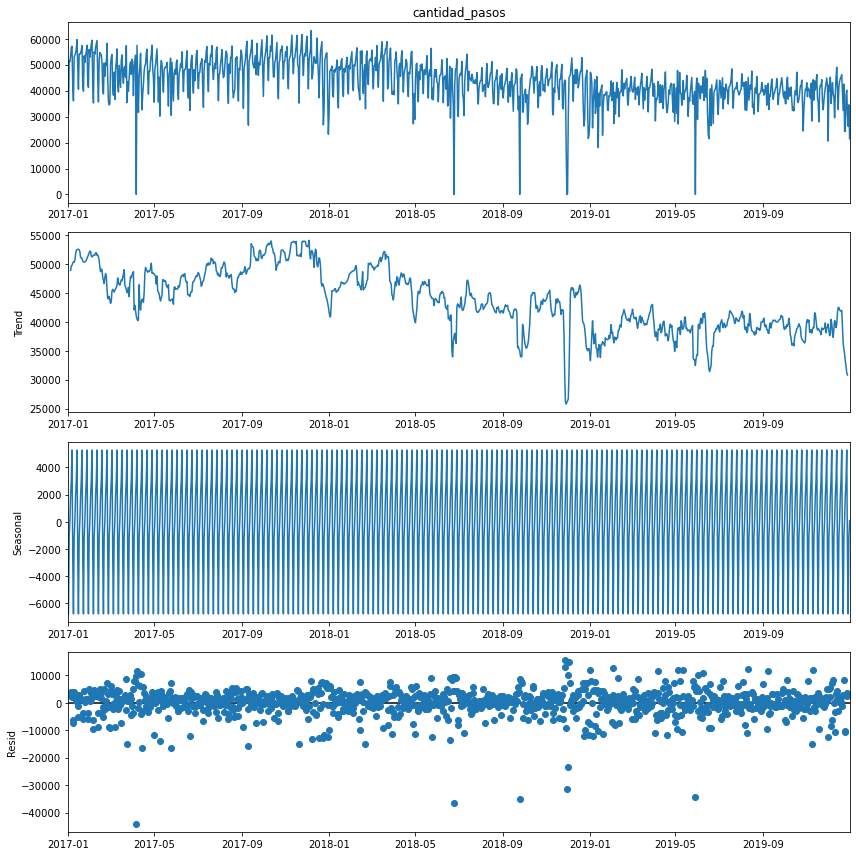

In [28]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

In [29]:
#Resample monthly
mensual = dataset.resample('M', on = 'fecha').sum()
print(mensual.shape)

(36, 1)


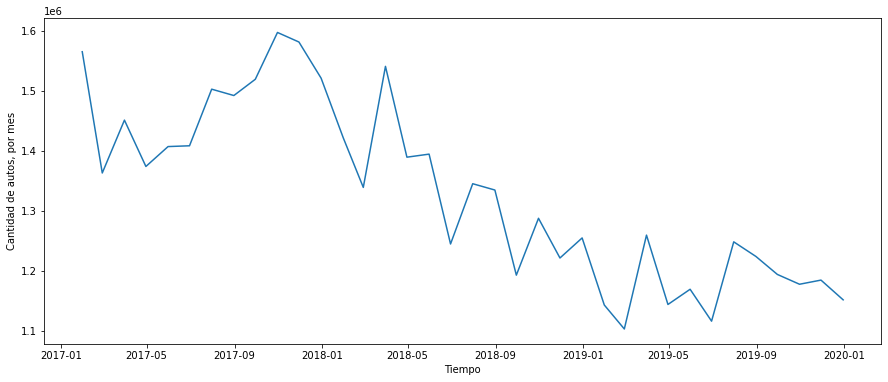

In [30]:
plt.figure(figsize = (15,6))
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(mensual.cantidad_pasos, model='additive')
# result.plot()
# pyplot.show()

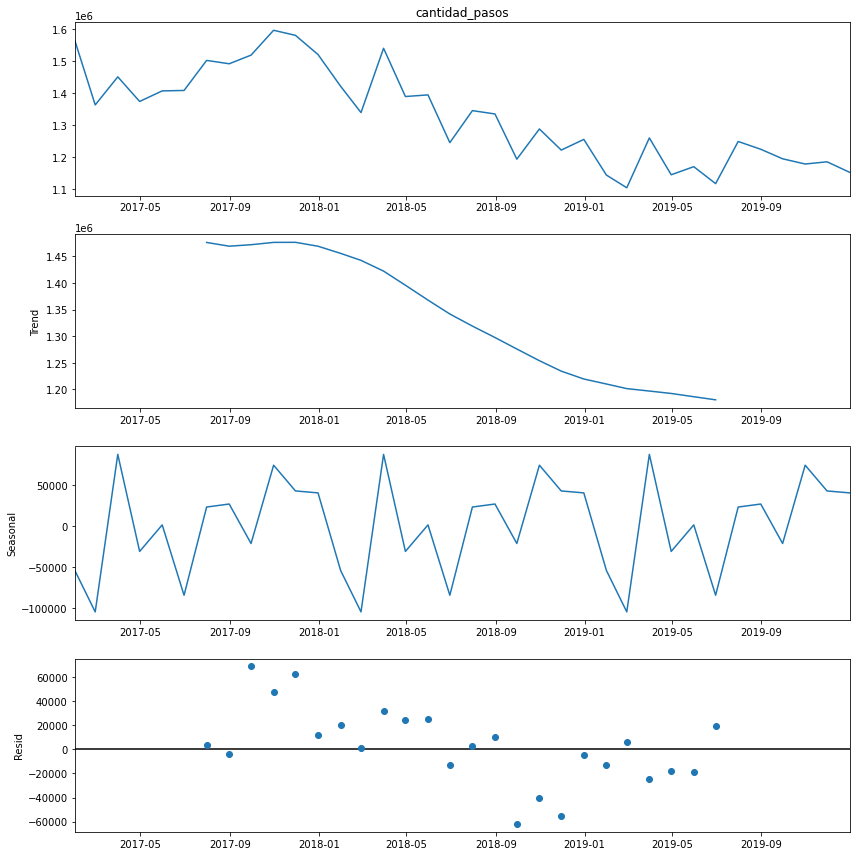

In [32]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

In [36]:
#It seems like we can find a pattern in the error, so should avoid this.

In [33]:
#Resample weekly
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


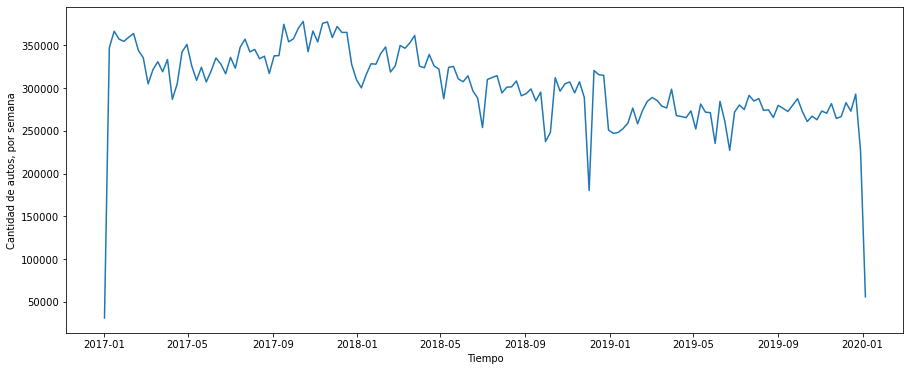

In [34]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(semanal.cantidad_pasos, model='additive')
# result.plot()
# pyplot.show()

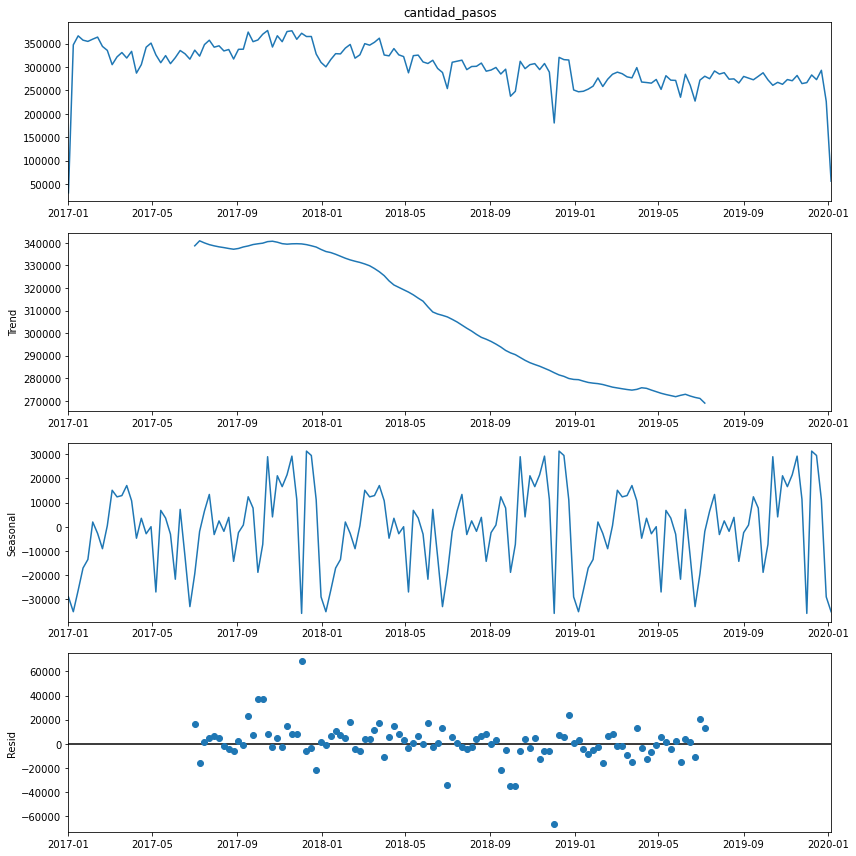

In [36]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

With the plots and the data that we saw, we could say that the best way to analyze this dataset is weekly.

In [37]:
#Continue with the data exploration
#A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

In [38]:
#See the autocorrelations

from statsmodels.tsa.stattools import acf

nlags =  52*2 #Number of lags to return autocorrelation for.
autocorr = acf(diario.cantidad_pasos, nlags = nlags)

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [39]:
autocorr.shape

(105,)

Text(0.5, 0, 'lag')

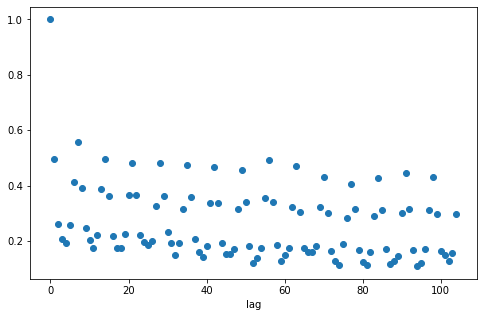

In [40]:
#plot
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

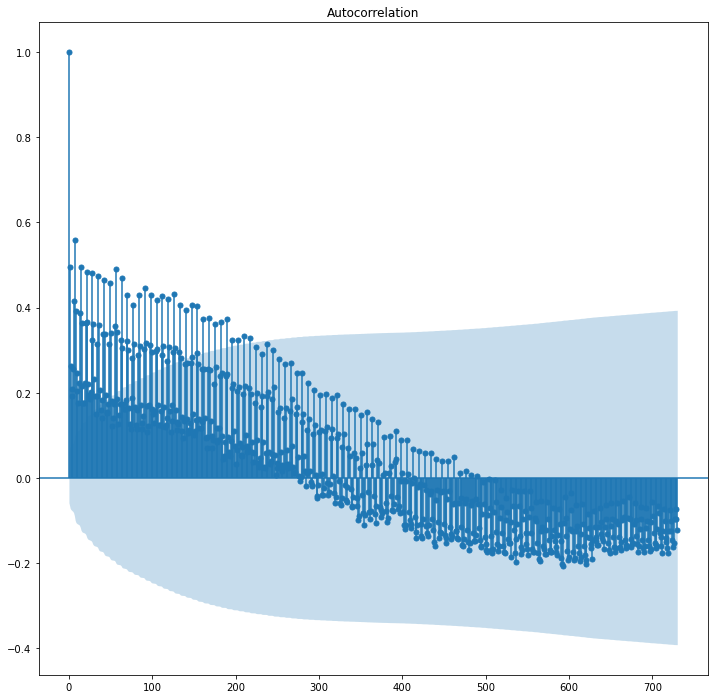

In [41]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diario, lags=365*2)
pyplot.show()

In [42]:
#monthly correlation
from statsmodels.tsa.stattools import acf

nlags =  12*2
autocorr = acf(mensual.cantidad_pasos, nlags = nlags)

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [43]:
autocorr.shape

(25,)

Text(0.5, 0, 'lag')

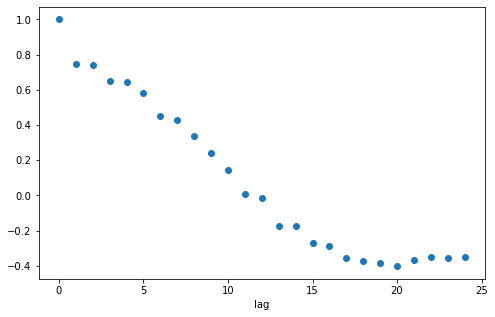

In [44]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

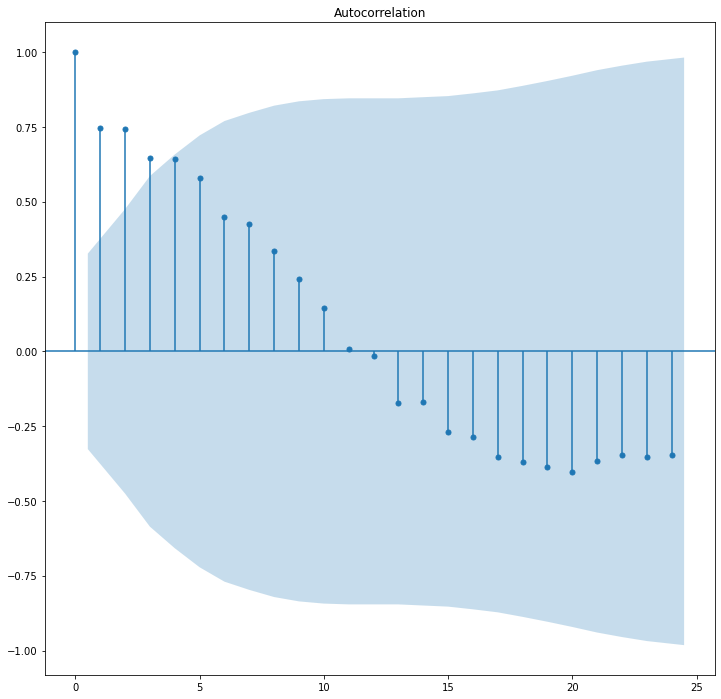

In [45]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(mensual, lags=12*2)
pyplot.show()

In [46]:
#Weekly autocorrelation
from statsmodels.tsa.stattools import acf

nlags =  52*2 #Number of lags to return autocorrelation for.
autocorr = acf(semanal.cantidad_pasos, nlags = nlags)

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [47]:
autocorr.shape

(105,)

Text(0.5, 0, 'lag')

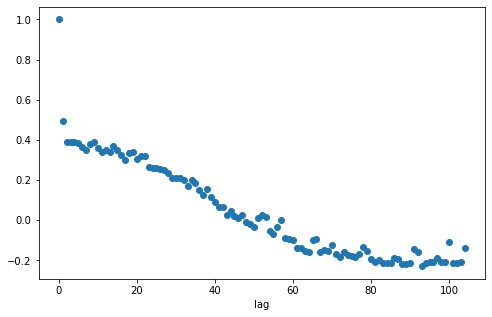

In [48]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

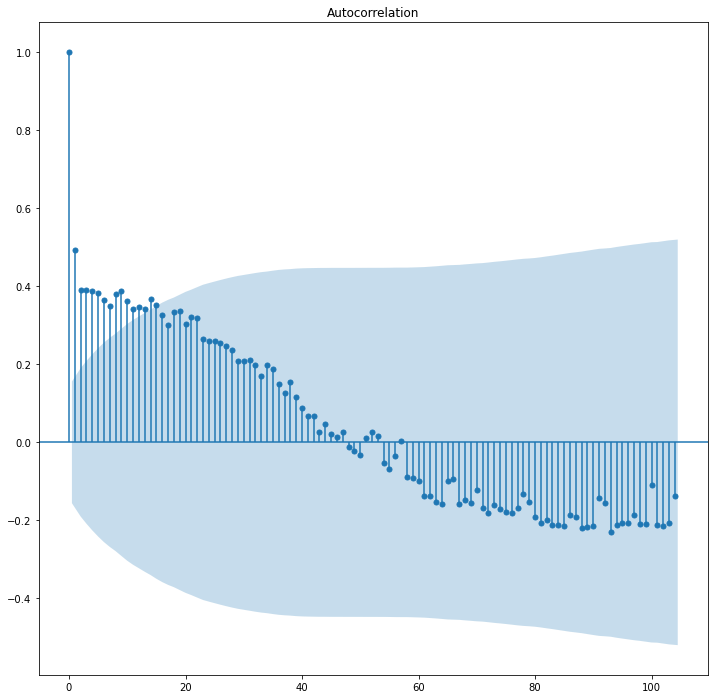

In [49]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(semanal, lags=52*2)
pyplot.show()

So we need 16 weeks to predict what will happen next, so that's what our look back will look like.
Observation: We decided to work the dataset on a weekly basis since in principle we did not find any pattern in the error graph, while in the monthly graph there seemed to be. On the other hand, although both the weekly and the daily are useful, since we have to estimate a quarter (the last of 2019) it will be better to estimate 12 values instead of 90 values, so we choose weekly. In addition, with the autocorrelation graphs we can see how far we will have to look back for our prediction.

In summary, with the observed correlograms, we note that as time passes, the correlation decreases, which implies that the predictions will lose certainty.

Primary Findings:
We see that the number of cars has been declining in recent years.
This could be due to a tendency of people to stay more and more time at home, remote work increasing with technological advances, or a component that we find important is that by using the "cash" means of payment, we can consider that many Drivers migrated to telepass, for example, due to the offers offered by it.
A noteworthy fact is that as of August 20, the telepass became mandatory on the highways of Buenos Aires,
https://www.buenosaires.gob.ar/jefaturadegabinete/noticias/felipe-miguel-en-la-legislatura-partir-del-28-de-agosto-sera-obligatorio
It is important to highlight this fact, since the transfer was not made from one day to the next, but rather it was a process that required time and was probably achieved gradually (it coincides with the graph).

In [50]:
#Continue with EDA
#We want to see the days with more traffic
exp = diario.groupby('fecha').sum('cantidad_pasos').sort_values(by= 'cantidad_pasos', ascending=False)
exp.head(7)

,cantidad_pasos
fecha,
2017-12-07,63127
2017-11-24,61594
2017-10-13,61421
2017-11-10,61382
2017-11-17,61259
2017-10-06,61099
2017-12-01,60985


In [51]:
#Days with less traffic
exp.tail(10) 

,cantidad_pasos
fecha,
2019-12-31,21447
2019-12-01,20553
2018-11-29,19728
2019-01-13,18076
2018-12-01,350
2017-04-06,40
2019-05-29,0
2018-06-25,0
2018-09-25,0


In [52]:
#Weeks with more traffic
exp_2 = semanal.groupby('fecha').sum('cantidad_pasos').sort_values(by= 'cantidad_pasos', ascending=False)
exp_2.head(7)

,cantidad_pasos
fecha,
2017-10-15,377832
2017-11-19,377263
2017-11-12,375644
2017-09-17,374520
2017-12-03,371970
2017-10-08,369918
2017-10-29,366650


In [53]:
#Weeks with less traffic
exp_2.tail()

,cantidad_pasos
fecha,
2019-06-23,227123
2019-12-29,226390
2018-12-02,180328
2020-01-05,55970
2017-01-01,31183


We noticed that it does not make much sense that the first week of January has the same number of steps in the whole week as a common day (actually less than the daily average), considering that it is a week where people usually go out vacation and more. This coincides with the outlier values that seem to be on the weekly chart (the same with the last week of December) which we understand is due to the fact that the weeks are "incomplete"

Regarding the 0 values in the number of daily steps:
- 2018-11-30 G20 Summit = Highway closed, including part of 2018-12-01
https://www.buenosaires.gob.ar/jefedegobierno/xiii-cumbre-lideres-g20/cumbre-del-g20-viernes-30-de-noviembre


We see that it makes sense, then, that the first week of December/18 is one of the least crowded.
Likewise, we see and understand the peak that the series makes that week (outlier)

In [54]:
#Months with more and with less traffic
exp_3 = mensual.groupby('fecha').sum('cantidad_pasos').sort_values(by= 'cantidad_pasos', ascending=False)

exp_3.head()

,cantidad_pasos
fecha,
2017-10-31,1597356
2017-11-30,1581428
2017-01-31,1565260
2018-03-31,1540839
2017-12-31,1521177


In [55]:
exp_3.tail()

,cantidad_pasos
fecha,
2019-12-31,1151645
2019-04-30,1143925
2019-01-31,1143023
2019-06-30,1116120
2019-02-28,1103086


In [56]:
print('Average daily steps',int(diario.mean())) 
print('Average weekly steps',int(semanal.mean()))
print('Average monthly steps', int(mensual.mean()))

Average daily steps 43712
Average weekly steps 302946
Average monthly steps 1329599


In [57]:
semanal.describe()

,cantidad_pasos
count,158.000000
mean,302946.715190
std,47342.854449
min,31183.000000
25%,276345.250000
50%,307094.000000
75%,334921.500000
max,377832.000000


In [58]:
semanal.isna().sum() #See missing values

cantidad_pasos    0
dtype: int64

In [59]:
#work with outliers.
semanal.cantidad_pasos[semanal.cantidad_pasos < 226391] = np.nan #use numpy

In [60]:
print(semanal.isna().sum())

cantidad_pasos    4
dtype: int64


In [61]:
print(semanal.isna().sum())
semanal = semanal.interpolate() #immpute nan values for the media
print(semanal.isna().sum())

cantidad_pasos    4
dtype: int64
cantidad_pasos    1
dtype: int64


In [62]:
semanal.isnull()

,cantidad_pasos
fecha,
2017-01-01,True
2017-01-08,False
2017-01-15,False
2017-01-22,False
2017-01-29,False
...,...
2019-12-08,False
2019-12-15,False
2019-12-22,False


In [63]:
semanal.dropna(inplace=True) #We can't impute the first value because there is no previous value
#So, we drop it

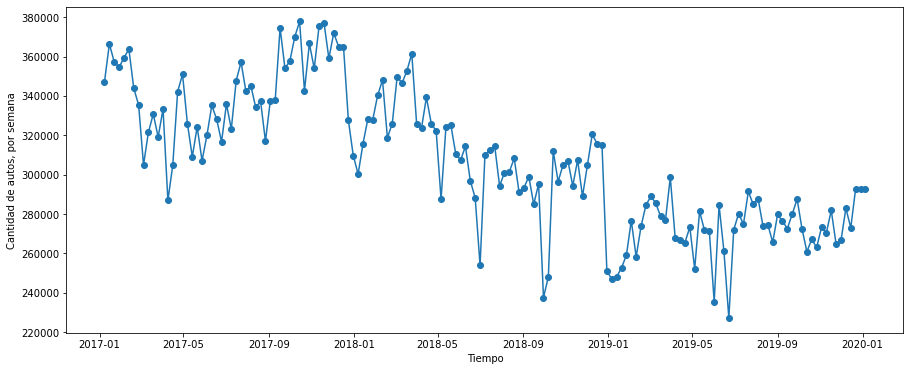

In [64]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.scatter(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

## Future Prediction 

### One-Step Prediction

We'll create a `RandomForestRegressor` to predict the traffic during the last three months of 2019. 

In [65]:
senial = semanal.cantidad_pasos
senial.head()

fecha
2017-01-08    347212.0
2017-01-15    366413.0
2017-01-22    357215.0
2017-01-29    354581.0
2017-02-05    359401.0
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

In [66]:
look_back = 16

In [67]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(140, 16) (140,)


In [68]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [69]:
print(X)

[[347212. 366413. 357215. ... 286862. 304912. 342225.]
 [366413. 357215. 354581. ... 304912. 342225. 350946.]
 [357215. 354581. 359401. ... 342225. 350946. 325875.]
 ...
 [265594. 279775. 276271. ... 264500. 266555. 282891.]
 [279775. 276271. 272592. ... 266555. 282891. 272960.]
 [276271. 272592. 279927. ... 282891. 272960. 292881.]]


In [70]:
print(y)

[350946.  325875.  309072.  324240.  307054.  319937.  335147.  328122.
 316651.  335900.  323159.  347770.  357156.  342240.  345164.  334245.
 337243.  316987.  337659.  337933.  374520.  353999.  357671.  369918.
 377832.  342571.  366650.  353947.  375644.  377263.  359053.  371970.
 364991.  365063.  327602.  309692.  300242.  315780.  328359.  327887.
 340275.  348044.  318733.  325966.  349768.  346506.  352713.  361465.
 325545.  323725.  339255.  325904.  322154.  287470.  324115.  325304.
 310709.  307369.  314291.  296834.  288154.  253807.  310012.  312335.
 314517.  294270.  300955.  301407.  308307.  290940.  293436.  298932.
 284913.  295210.  237507.  247986.  312089.  296381.  304897.  307134.
 294310.  307352.  288934.  304707.5 320481.  315645.  314832.  250861.
 246994.  248077.  252617.  259019.  276568.  258204.  273664.  284439.
 288919.  285547.  278834.  276714.  298638.  267797.  266745.  265423.
 273282.  252104.  281283.  271796.  271232.  235301.  284432.  

In [71]:
N_train =  156 -12 - look_back # Instances we'll use to train
N_test = 12 #instances to evaluate/test
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(128, 16) (128,)
(12, 16) (12,)


In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 1).fit(X_train,y_train)

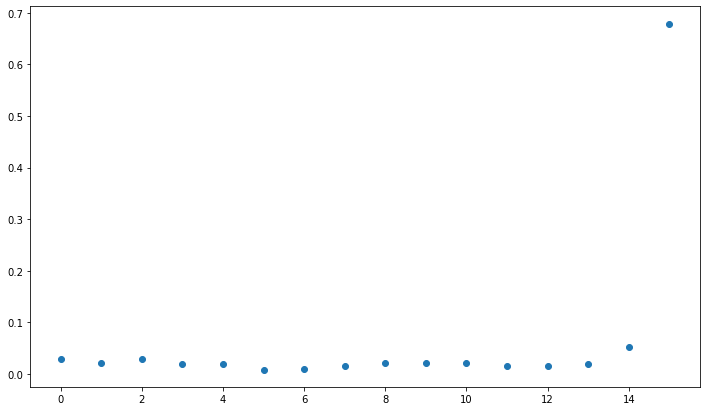

In [73]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
# for x in np.arange(3)*52:
#     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

In [74]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

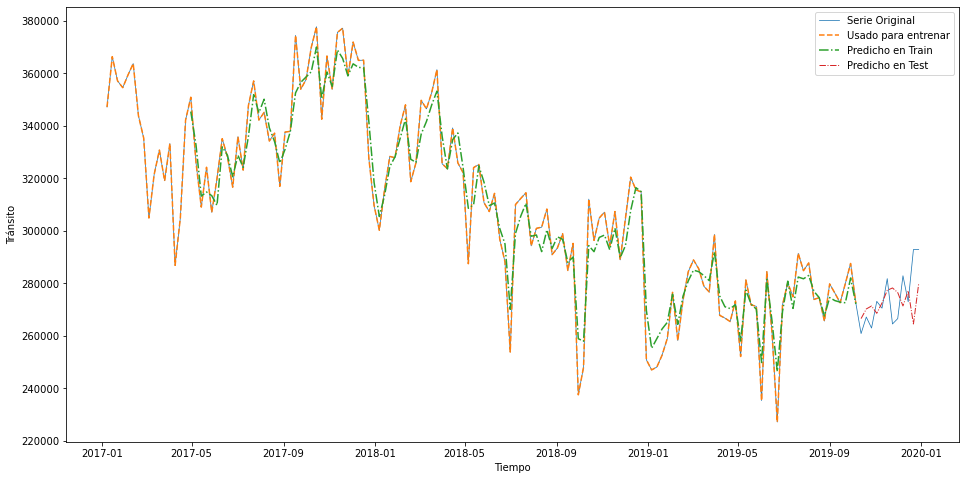

In [75]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 1, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Tránsito')
plt.show()

In [76]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 7609.63613081749
Error en Test: 11446.278488647165


In [77]:
#Optimize hiperparameters
rf1 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 1).fit(X_train,y_train)

param_grid = {'max_depth': [4,6,10,24],   
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[1,2,5,7,10],}

In [78]:
%%time
from sklearn.model_selection import GridSearchCV
# Grid Search
rf1_ = GridSearchCV(rf1, param_grid=param_grid, cv=5)

# Entrenamos: tree con la grilla definida arriba y CV con tamaño de Fold=5

rf1_.fit(X_train, y_train)

Wall time: 50.5 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=1, random_state=42),
             param_grid={'max_depth': [4, 6, 10, 24],
                         'min_samples_leaf': [1, 2, 5, 7, 10],
                         'min_samples_split': [2, 4, 6]})

In [79]:
print("Best parameters: "+str(rf1_.best_params_)) #Me da el mejor parametro

Best parameters: {'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [80]:
y_pred = rf1_.predict(X)
y_train_pred = rf1_.predict(X_train)
y_test_pred = rf1_.predict(X_test)

MSE = mean_squared_error(y_train, y_train_pred)
print('TRAIN ERROR:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('TEST ERROR:',np.sqrt(MSE))

TRAIN ERROR: 13639.49995170528
TEST ERROR: 11097.178002682027


With hyperparameter optimization, our model improved 349 steps in the weekly forecast (test)

**Benchmark**: we compare the error with what we would have obtained if we predicted by copying the value of the previous date.

In [81]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

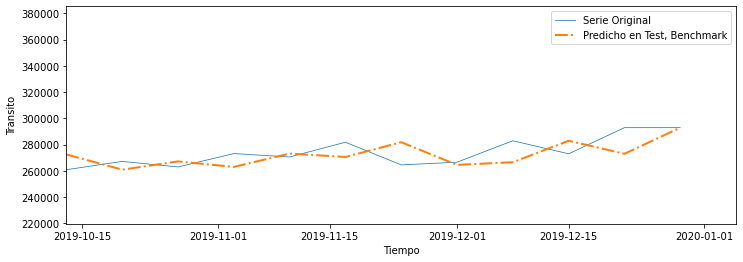

In [82]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Transito')
plt.legend()
plt.show()

In [83]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

11163.346780125274


We see that the error improved compared to the benchmark on the Test set, from a weekly error of 11163 steps to 11097. Taking into account that the weekly average is 302946, the error is only 3.66%

As we have seen with the importance of features, the most important thing when predicting is to see the previous value.

### 2.2. Multi-Step Prediction

With the model already trained, we are going to use the recursive method to do Multi-Step prediction.

In [84]:
y_ms_test_pred = []
x = X_test[0,:] #we start with the first instance of the test set
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

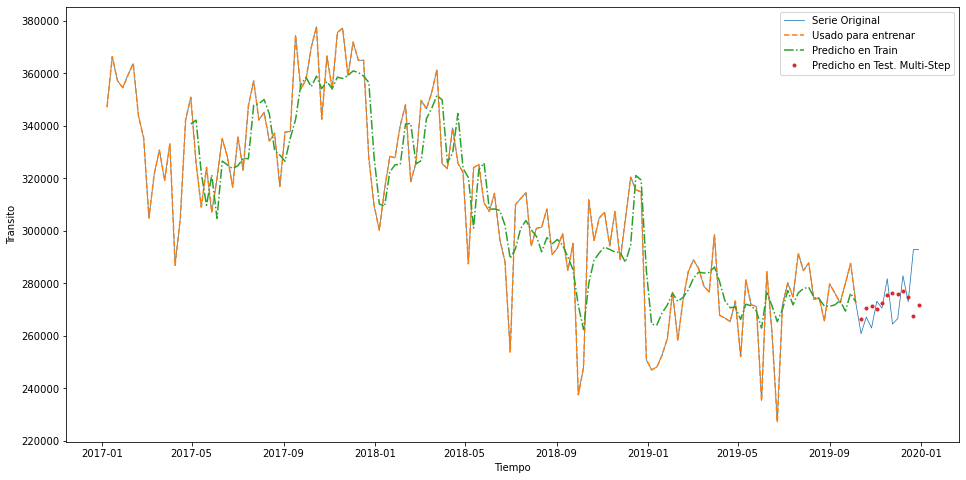

In [85]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Transito')
plt.show()

In [ ]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Test Error:',np.sqrt(MSE))

The error is very similar to the previous model 

Comments:
First, we chose MSE as the metric since the Mean Absolute Error is the average of the difference between the Original Value and the Predicted Value. It gives us an idea of how far our prediction is from the output.

  As we take the square of the error, the effect of larger errors becomes more pronounced than smaller error, so the model can now focus more on larger errors. Likewise, the lower the MAE, MSE or RMSE, the better the regressor. In general, MSE and RMSE are more sensitive to outliers. However, the MSE has a small disadvantage, which is that since the error is squared, it does not have the same magnitude or units as the variable and, therefore, the root mean squared error is usually used. , RMSE). We will use the last one mentioned.

#### XGBoost

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
mgb = GradientBoostingRegressor().fit(X_train,y_train)


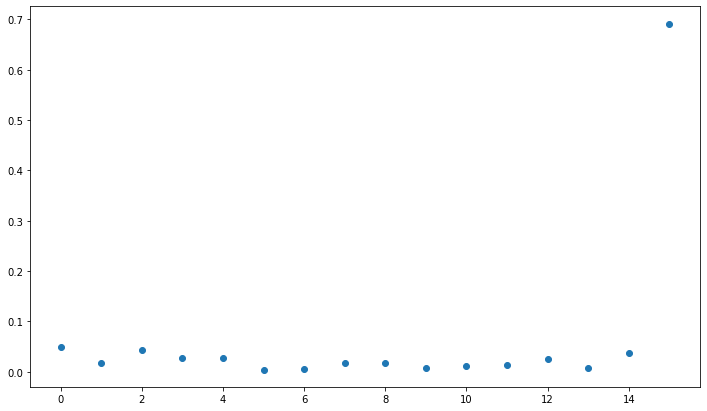

In [88]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(mgb.feature_importances_.size),mgb.feature_importances_)
#Vemos que la información de la semana anterior es la más importante...

In [89]:
y_train_pred = mgb.predict(X_train)
y_test_pred = mgb.predict(X_test)

MSE = mean_squared_error(y_train, y_train_pred)
print('Train Error:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Test Error:',np.sqrt(MSE))

Train Error: 3290.4280231550815
Test Error: 12644.211540859422


In [90]:
#Multi-Step Prediction
y_ms_test_pred = []
x = X_test[0,:]
for i in range(y_test.size):
    y_os_pred = mgb.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

In [92]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Test Error:',np.sqrt(MSE))

Test Error: 11894.884773805064


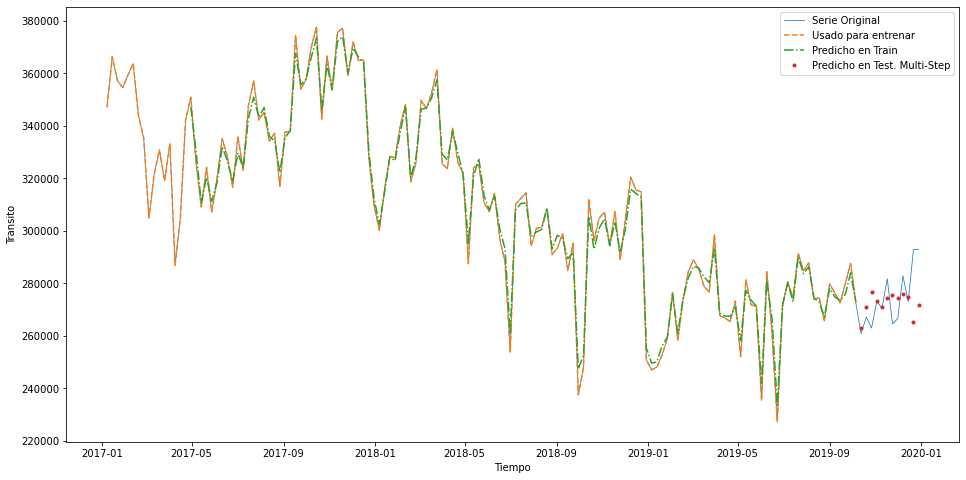

In [93]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Transito')
plt.show()

It would seem that XG Boost is the model that performs best in the train but not in the Test. The Random Forest error is smaller in our test set (what we want to predict), however, the difference is not significant.

In [94]:
#We'll add the data from 2020 and see the predictions

In [95]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [96]:
data_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [97]:
mask = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020 = data_2020[mask]
#Drop the columns
data_2020.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

data_2020.head()

,fecha,mes,dia,dia_fecha,hora_fin,tipo_vehiculo,observacion,sentido,cantidad_pasos
52,2020-01-01 00:00:00,enero,Miércoles,1.0,1.0,Auto,Efectivo,Centro,326.0
53,2020-01-01 00:00:00,enero,Miércoles,1.0,1.0,Auto,Efectivo,Provincia,319.0
134,2020-01-01 00:00:00,enero,Miércoles,1.0,2.0,Auto,Efectivo,Centro,199.0
135,2020-01-01 00:00:00,enero,Miércoles,1.0,2.0,Auto,Efectivo,Provincia,180.0
202,2020-01-01 00:00:00,enero,Miércoles,1.0,3.0,Auto,Efectivo,Centro,114.0


In [98]:
#Modify the date format
data_2020['fecha2'] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')

data_2020.drop(columns=['fecha','hora_fin'], inplace = True)

data_2020.head()

,mes,dia,dia_fecha,tipo_vehiculo,observacion,sentido,cantidad_pasos,fecha2
52,enero,Miércoles,1.0,Auto,Efectivo,Centro,326.0,2020-01-01 01:00:00
53,enero,Miércoles,1.0,Auto,Efectivo,Provincia,319.0,2020-01-01 01:00:00
134,enero,Miércoles,1.0,Auto,Efectivo,Centro,199.0,2020-01-01 02:00:00
135,enero,Miércoles,1.0,Auto,Efectivo,Provincia,180.0,2020-01-01 02:00:00
202,enero,Miércoles,1.0,Auto,Efectivo,Centro,114.0,2020-01-01 03:00:00


In [99]:
data_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 


In [100]:
#Sort values by date
data_2020.sort_values('fecha', inplace = True)
data_2020.reset_index(drop=True, inplace = True)

In [101]:
#Resampleamos Weekly
semanal_2020 = data_2020.resample('W', on = 'fecha').sum()
print(semanal_2020.shape)
semanal_2020.head()

(53, 2)


,dia_fecha,cantidad_pasos
fecha,,
2020-01-05,3119.0,150623.0
2020-01-12,12928.0,243359.0
2020-01-19,23816.0,246818.0
2020-01-26,34297.0,241192.0
2020-02-02,32671.0,253335.0


In [102]:
semanal_test = semanal_2020[semanal_2020.index < "2020-03-29"]
semanal_trash = semanal_2020[semanal_2020.index >= "2020-03-29"] #We selected the first trimester because then we had the mandatory quarantine

In [103]:
del(semanal_test['dia_fecha'])

In [104]:
#Marge all the datasets
semanal_concat = semanal[semanal.index< "2020-01-01"]

In [105]:
semanal_concatenado = pd.concat([semanal_concat, semanal_test])

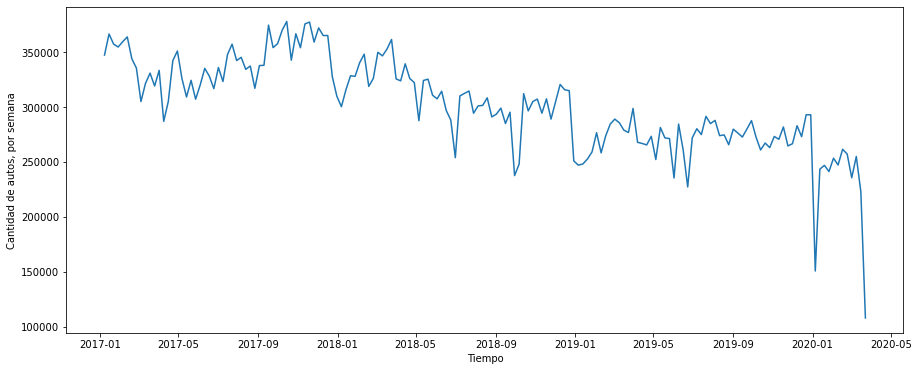

In [106]:
plt.figure(figsize = (15,6))
plt.plot(semanal_concatenado.index, semanal_concatenado.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

In [107]:
#Drop the final values
semanal_concatenado.cantidad_pasos[semanal_concatenado.cantidad_pasos <160000] = np.nan #numpy

In [108]:
print(semanal_concatenado.isna().sum())
semanal_concatenado = semanal_concatenado.interpolate()
print(semanal_concatenado.isna().sum())

cantidad_pasos    2
dtype: int64
cantidad_pasos    0
dtype: int64


In [109]:
senial = semanal_concatenado.cantidad_pasos
senial.tail()

fecha
2020-02-23    257096.0
2020-03-01    235487.0
2020-03-08    254910.0
2020-03-15    222793.0
2020-03-22    222793.0
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

In [110]:
look_back = 16
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back-1 )
print(X.shape, y.shape)

(151, 16) (151,)


In [111]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [112]:
N_train =  168 - 12 - look_back 
N_test = 12 -1 
N_total = N_train + N_test

length_total = N_train + N_test + look_back 

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(140, 16) (140,)
(11, 16) (11,)


In [113]:
y_pred = rf.predict(X) #Use the created model
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [115]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Train Error:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Test Error:',np.sqrt(MSE))

Train Error: 8010.817434853192
Test Error: 25759.67927843722


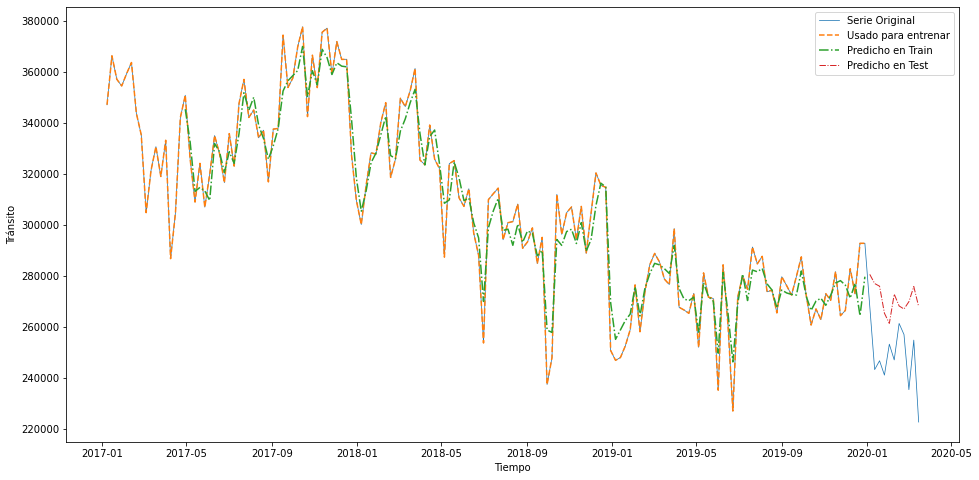

In [116]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 1, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Tránsito')
plt.show()

The Random Forest model poorly predicts the year 2020 (1st quarter)

In [117]:
#See XGBoost
y_train_pred = mgb.predict(X_train)
y_test_pred = mgb.predict(X_test)

MSE = mean_squared_error(y_train, y_train_pred)
print('Train Error:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Test Error:',np.sqrt(MSE))

Train Error: 4858.246558726025
Test Error: 27981.68672375048


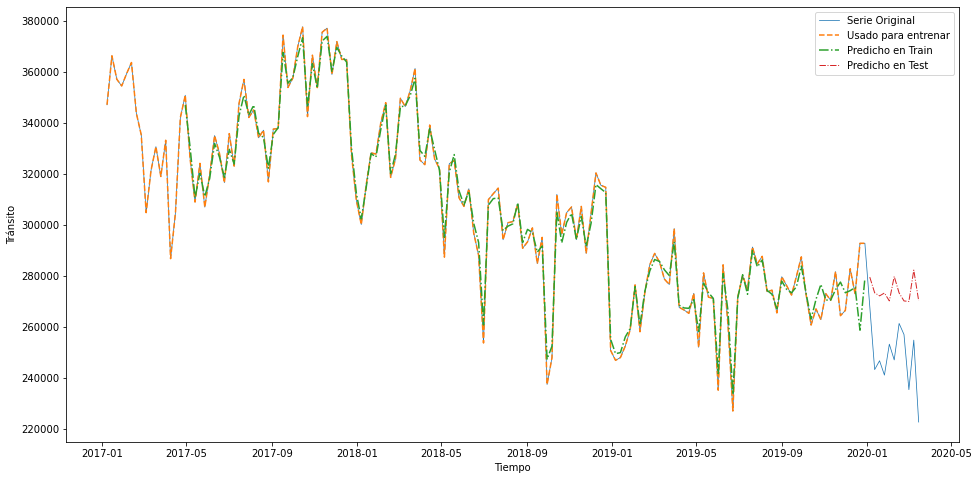

In [118]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 1, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Tránsito')
plt.show()

Something similar happens with XG Boost, it fails to accurately predict the year 2020.

In [119]:
#Include the data from 2016 to see what happen with the predictions
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')

In [120]:
data_2016.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,NO COBRADO,32
1,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,AUPASS,9
2,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,NO COBRADO,1
3,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EFECTIVO,4
4,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EXENTO,3


In [121]:
mask = np.logical_and(data_2016.estacion=='Illia', data_2016.forma_pago == 'EFECTIVO')
data_2016 = data_2016[mask]

data_2016.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)


In [122]:
data_2016['fecha2'] = pd.to_datetime(data_2016.fecha) + pd.to_timedelta(data_2016.hora_fin, unit = 'h')

data_2016.drop(columns=['fecha','hora_fin'], inplace = True)

data_2016.rename(columns = {'fecha2':'fecha'}, inplace = True) 

In [123]:
data_2016.sort_values('fecha', inplace = True)
data_2016.reset_index(drop=True, inplace = True)

In [124]:
data_2016

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Viernes,Centro,Liviano,14,2016-01-01 00:00:00
1,Viernes,Provincia,Pesado,4,2016-01-01 00:00:00
2,Viernes,Provincia,Liviano,385,2016-01-01 00:00:00
3,Viernes,Provincia,Liviano,8,2016-01-01 00:00:00
4,Viernes,Centro,Liviano,649,2016-01-01 00:00:00
...,...,...,...,...,...
107692,Sábado,Provincia,Liviano,5,2016-12-31 23:00:00
107693,Sábado,Centro,Liviano,10,2016-12-31 23:00:00
107694,Sábado,Centro,Liviano,224,2016-12-31 23:00:00
107695,Sábado,Provincia,Liviano,207,2016-12-31 23:00:00


In [125]:
#Resample
semanal_2016 = data_2016.resample('W', on = 'fecha').sum()
print(semanal_2016.shape)
semanal_2016.head()

(53, 1)


,cantidad_pasos
fecha,
2016-01-03,98963
2016-01-10,342201
2016-01-17,359649
2016-01-24,346217
2016-01-31,348221


In [126]:
semanal_concatenado1 = pd.concat([semanal_2016, semanal_concatenado]) #unimos en un dataset todos los años desde 2016 hasta el 1er trimestre 2020

In [127]:
semanal_concatenado1 = semanal_concatenado1[semanal_concatenado1.index > "2016-01-04"]

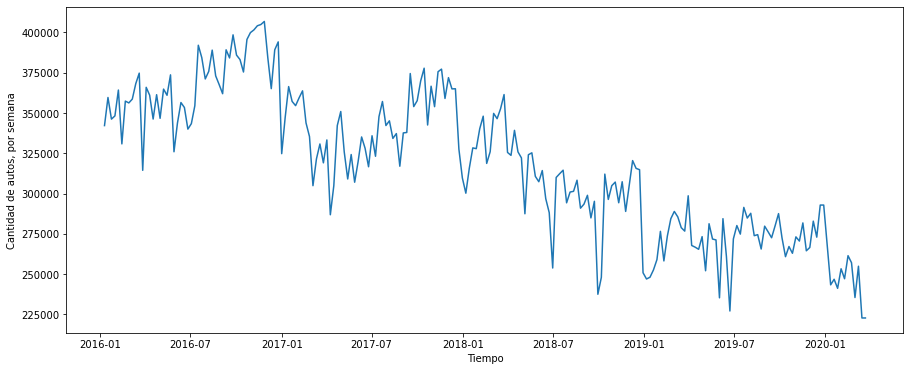

In [128]:
plt.figure(figsize = (15,6))
plt.plot(semanal_concatenado1.index, semanal_concatenado1.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

In [129]:
senial = semanal_concatenado1.cantidad_pasos
senial.head()

fecha
2016-01-10    342201.0
2016-01-17    359649.0
2016-01-24    346217.0
2016-01-31    348221.0
2016-02-07    364271.0
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

In [130]:
look_back = 16
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back-1 )
print(X.shape, y.shape)

(203, 16) (203,)


In [131]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [132]:
N_train =  220 - 12 - look_back  
N_test = 12 -1
N_total = N_train + N_test

length_total = N_train + N_test + look_back 

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(192, 16) (192,)
(11, 16) (11,)


In [133]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 1).fit(X_train,y_train)

In [134]:
y_pred = rf2.predict(X) #Predict with the created model but trained with the data since 2016
y_train_pred = rf2.predict(X_train)
y_test_pred = rf2.predict(X_test)

In [135]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Train Error:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Test Error:',np.sqrt(MSE))

Train Error: 7465.235085854769
Test Error: 27278.1360126686


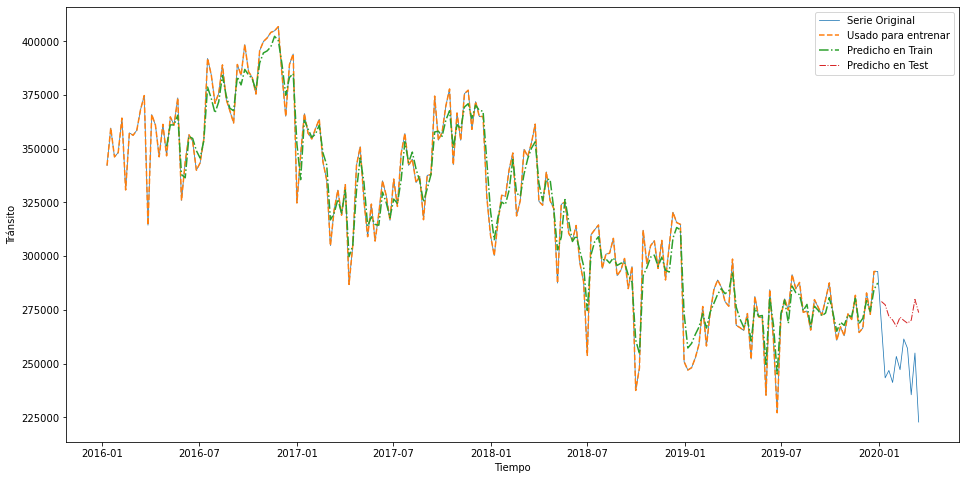

In [136]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 1, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Tránsito')
plt.show()

In [137]:
mgb1 = GradientBoostingRegressor().fit(X_train,y_train)

In [138]:
y_train_pred = mgb1.predict(X_train)
y_test_pred = mgb1.predict(X_test)

MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 5365.6714023695995
Error en Test: 27962.03441888358


When trying to predict the year 2020, the error is similar using the 2016 dataset and without using it. This is because, as we saw earlier, the previous week is important at the time of forecasting, so what happened more than 100 weeks ago will not be relevant. This is to say that we will not be interested in including years prior to 2017, because as we saw previously, not only do they not contribute to the prediction, but on the contrary, they add little useful information to our final dataset that will occupy more memory.

#### Keep testing models, now we'll try with PROPHET from facebook 

In [22]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [23]:
#Prepare the data
semanal['ds'] = semanal.index

In [24]:
semanal = semanal.rename_axis('').reset_index()

In [25]:
del(semanal[''])

In [26]:
semanal.rename(columns={'cantidad_pasos':'y'}, inplace=True)

In [27]:
semanal = semanal[['ds','y']]

In [50]:
semanal.tail(15) #We'll use since this day to predict

,ds,y
142,2019-09-29,287568.0
143,2019-10-06,272483.0
144,2019-10-13,260840.0
145,2019-10-20,267147.0
146,2019-10-27,262950.0
147,2019-11-03,273129.0
148,2019-11-10,270536.0
149,2019-11-17,281790.0
150,2019-11-24,264500.0
151,2019-12-01,266555.0


In [25]:
semanal['ds'] = semanal['ds'].astype(str)

In [65]:
#train test split. TRAIN until el 29/09/2019 (DD/MM/YY). WE look to predict the last quarter of 2019
semanal_train = semanal[semanal.ds < "2019-09-29"]
semanal_valid = semanal[semanal.ds >= "2019-09-29"]
semanal_valid = semanal_valid[semanal_valid.ds < "2019-12-29"]

In [67]:
semanal_valid.tail()

,ds,y
150,2019-11-24,264500.0
151,2019-12-01,266555.0
152,2019-12-08,282891.0
153,2019-12-15,272960.0
154,2019-12-22,292881.0


In [68]:
#Prepare the model
m = Prophet() #Create and train 
m.fit(semanal_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
forecast = m.predict(semanal_valid) #Predict the last quarter of 2019

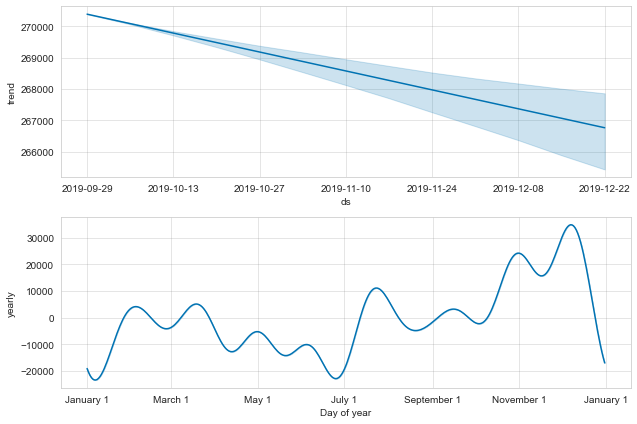

In [70]:
fig = m.plot_components(forecast)

In [52]:
semanal_valid.mean() 

C:\Users\Usuario\miniconda3\envs\ds_prophet\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


y    276132.8
dtype: float64

In [71]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(semanal_valid['y'], forecast['yhat'])
print('Test Error:',np.sqrt(MSE))

Error en Test: 19322.074507483514


In [72]:
forecast_to_grafic = forecast[['ds', 'yhat']]

In [73]:
forecast_to_grafic.rename(columns={'yhat':'Predicho'}, inplace=True)

C:\Users\Usuario\miniconda3\envs\ds_prophet\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<AxesSubplot:xlabel='ds', ylabel='y'>

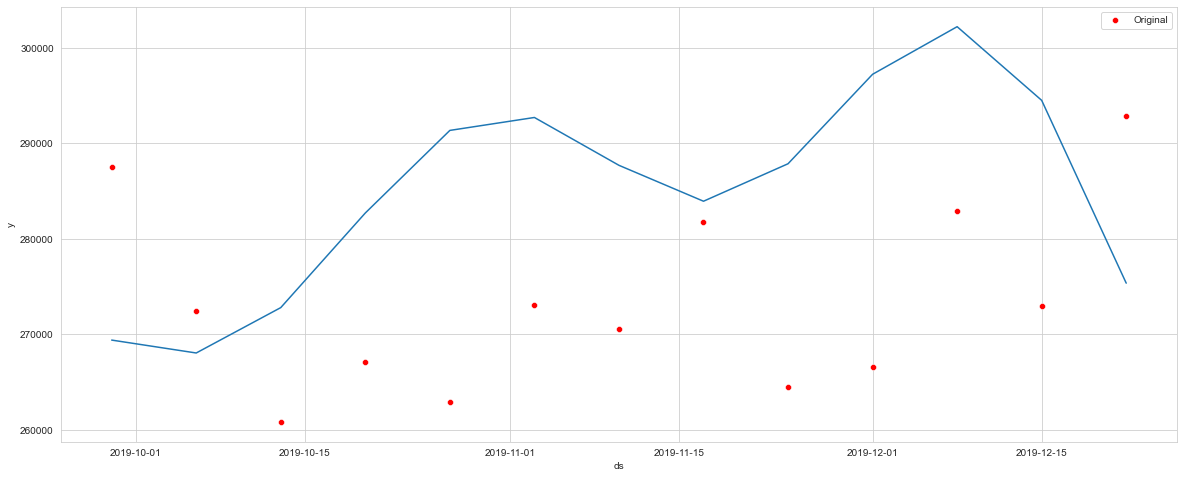

In [74]:
#See the comparison between the real and predicted values
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=[20,8])
sns.scatterplot(x=semanal_valid['ds'], y=semanal_valid['y'], color='r', label='Original')
sns.lineplot(x=forecast_to_grafic['ds'], y=forecast_to_grafic['Predicho'])

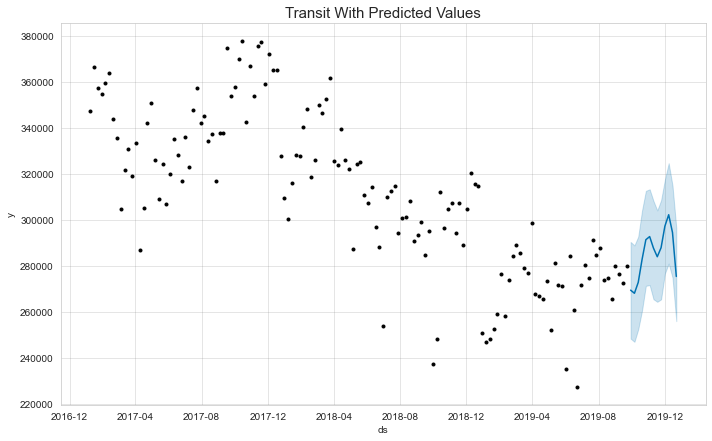

In [75]:
import seaborn as sns
m.plot(forecast)
plt.title('Transit With Predicted Values', fontsize=15)
plt.show()

In [141]:
#Optimize the model 
import itertools
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.5],
    'seasonality_prior_scale': [0.01, 0.1],
    'n_changepoints': [60,40,30],
    'uncertainty_samples': [1200,2500],
    'changepoint_range': [0.5,0.7]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(semanal_train)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days',parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 40 forecasts with cutoffs between 2018-01-15 00:00:00 and 2019-08-23 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000097B46EFAC8>
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 40 forecasts with cutoffs between 2018-01-15 00:00:00 and 2019-08-23 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000097B46C8288>
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Ru

    changepoint_prior_scale  seasonality_prior_scale  n_changepoints  \
0                     0.001                     0.01              60   
1                     0.001                     0.01              60   
2                     0.001                     0.01              60   
3                     0.001                     0.01              60   
4                     0.001                     0.01              40   
5                     0.001                     0.01              40   
6                     0.001                     0.01              40   
7                     0.001                     0.01              40   
8                     0.001                     0.01              30   
9                     0.001                     0.01              30   
10                    0.001                     0.01              30   
11                    0.001                     0.01              30   
12                    0.001                     0.10            

In [142]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'n_changepoints': 60, 'uncertainty_samples': 1200, 'changepoint_range': 0.7}


In [76]:
m = Prophet(n_changepoints=60, uncertainty_samples=1200, changepoint_range=0.7, changepoint_prior_scale=0.5,seasonality_prior_scale= 0.01) #Lo creamos y luego lo entrenamos con el dataset de train
m.fit(semanal_train)
forecast = m.predict(semanal_valid) #Predecimos el ultimo trimestre de 2019
MSE = mean_squared_error(semanal_valid['y'], forecast['yhat'])
print('Error en Test:',np.sqrt(MSE))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error en Test: 16868.665195392565


In [40]:
#What happens with 2020?
semanal_2020['ds'] = semanal_2020.index

In [41]:
semanal_2020 = semanal_2020.rename_axis('').reset_index()

In [42]:
del(semanal_2020[''])
del(semanal_2020['dia_fecha'])

In [43]:
semanal_2020.rename(columns={'cantidad_pasos':'y'}, inplace=True)

In [44]:
semanal_2020 = semanal_2020[['ds','y']]

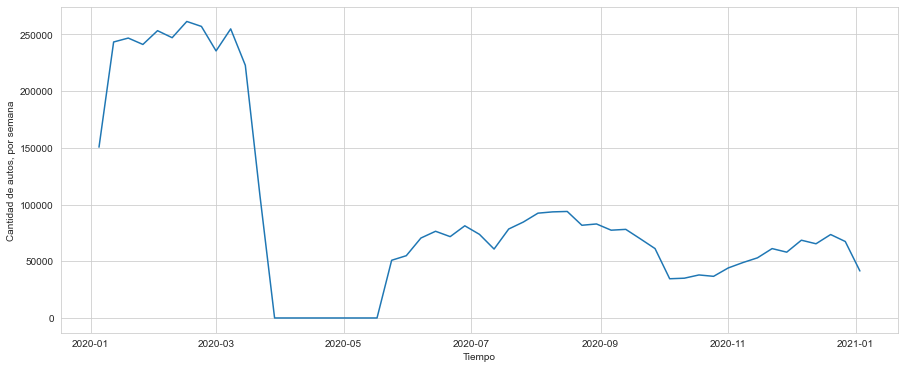

In [45]:
plt.figure(figsize = (15,6))
plt.plot(semanal_2020.ds, semanal_2020.y)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

In [81]:
semanal_test = semanal[semanal.ds < "2020-03-29"]
semanal_trash = semanal[semanal.ds >= "2020-03-29"]

In [82]:
forecast_2020 = m.predict(semanal_test) #Predecimos el ultimo trimestre de 2019
MSE = mean_squared_error(semanal_test['y'], forecast_2020['yhat'])
print('Error en Test:',np.sqrt(MSE))

Error en Test: 14559.17692315534


In [139]:
#Our model is better at predicting the first quarter of 2020 than predicting the last quarter of 2019.

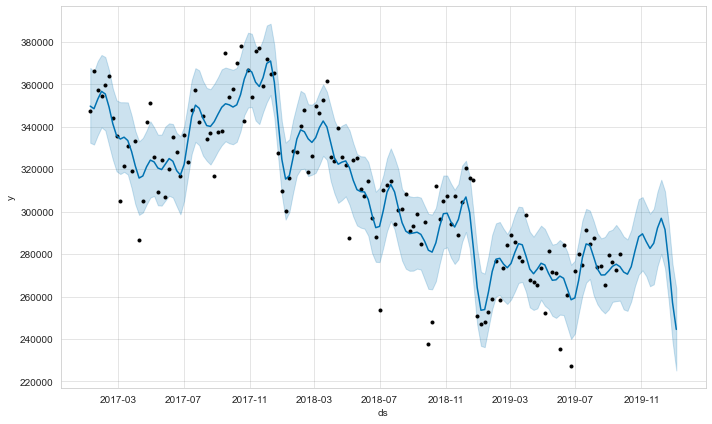

In [83]:
fig_2020 = m.plot(forecast_2020)

Although our Prophet model was not the best at predicting the last quarter of 2019 (it had an error of 16868 while the Random Forest and XG Boost models had less error). We know that this is not a significant error considering that the average weekly steps in the last quarter of 2019 is 276132.8.

However, when predicting 2020 we see that our Prophet model is much better than the previous ones, the error is even smaller than that obtained in the prediction of the previous quarter. With this in mind, we chose this model over the rest as it understands the nature of our data much better.

#### Research:

1)Considering that we only use the Illia Highway, it would be interesting to see what happens with the passage on other highways, although, however, they probably respect the same patterns.

2) It would be interesting to be able to test what happens with the model if we incorporate TELEPASE. In the case of the type/form of payment, probably if we try "telepass" the form of the series will be different, which would perhaps lead to a random forest or Boosting model being able to better predict the year 2020, taking into account that the trend it would not (probably) decrease precisely because of what was mentioned above about the mandatory use of this route.

Based on this, we will modify what is necessary to be able to see the time series in other toll stations, as well as modifying the payment method.

In [3]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [4]:
dataset_p = pd.concat([data_2019, data_2018, data_2017])

mask1 = np.logical_and(dataset_p.estacion=='Alberti', dataset_p.forma_pago == 'EFECTIVO')


dataset_p = dataset_p[mask1]


dataset_p.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)


In [5]:
dataset_p['fecha2'] = pd.to_datetime(dataset_p.fecha) + pd.to_timedelta(dataset_p.hora_fin, unit = 'h')


dataset_p.drop(columns=['fecha','hora_fin'], inplace = True)

In [6]:
dataset_p.sort_values('fecha2', inplace = True)
dataset_p.reset_index(drop=True, inplace = True)
dataset_p

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
0,Martes,Provincia,Liviano,148,2019-01-01 00:00:00
1,Martes,Centro,Liviano,27,2019-01-01 00:00:00
2,Martes,Provincia,Liviano,182,2019-01-01 02:00:00
3,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
4,Martes,Provincia,Pesado,1,2019-01-01 03:00:00
...,...,...,...,...,...
29208,Martes,Provincia,Liviano,183,2019-12-31 22:00:00
29209,Martes,Centro,Pesado,1,2019-12-31 23:00:00
29210,Martes,Provincia,Liviano,44,2019-12-31 23:00:00
29211,Martes,Centro,Liviano,45,2019-12-31 23:00:00


In [7]:
semanal_p1 = dataset_p.resample('W', on = 'fecha2').sum()
print(semanal_p1.shape)
semanal_p1.head()

(53, 1)


,cantidad_pasos
fecha2,
2019-01-06,45429
2019-01-13,48783
2019-01-20,50154
2019-01-27,48501
2019-02-03,54367


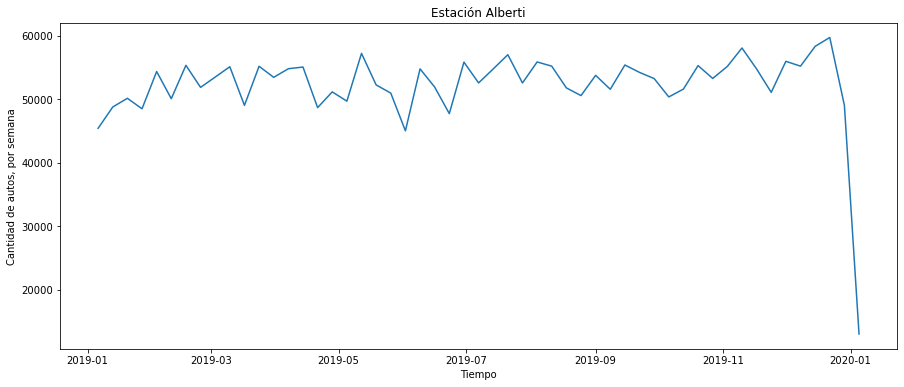

In [8]:
plt.figure(figsize = (15,6))
plt.title('Estación Alberti')
plt.plot(semanal_p1.index, semanal_p1.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

This plot is quite different than the Illia Station because the trend isn't as clear as it was (here seems more flat) and the number of vehicles is lower

In [9]:
#Keep searching 

dataset_n = pd.concat([data_2019, data_2018, data_2017])

#Testing different stations and payments
mask4 = np.logical_and(dataset_n.estacion=='Avellaneda', dataset_n.forma_pago == 'EFECTIVO')
mask5 = np.logical_and(dataset_n.estacion=='Illia', dataset_n.forma_pago == 'TELEPASE')

dataset_n4 = dataset_n[mask4]
dataset_n5 = dataset_n[mask5]

#Drop useless columns
dataset_n4.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
dataset_n5.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
#Work with the date format
dataset_n4['fecha2'] = pd.to_datetime(dataset_n4.fecha) + pd.to_timedelta(dataset_n4.hora_fin, unit = 'h')
dataset_n5['fecha2'] = pd.to_datetime(dataset_n5.fecha) + pd.to_timedelta(dataset_n5.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_n4.drop(columns=['fecha','hora_fin'], inplace = True)
dataset_n5.drop(columns=['fecha','hora_fin'], inplace = True)

<ipython-input-10-0b81f103fef0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_n4['fecha2'] = pd.to_datetime(dataset_n4.fecha) + pd.to_timedelta(dataset_n4.hora_fin, unit = 'h')
<ipython-input-10-0b81f103fef0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_n5['fecha2'] = pd.to_datetime(dataset_n5.fecha) + pd.to_timedelta(dataset_n5.hora_fin, unit = 'h')


In [11]:
dataset_n4.sort_values('fecha2', inplace = True)
dataset_n4.reset_index(drop=True, inplace = True)

dataset_n5.sort_values('fecha2', inplace = True)
dataset_n5.reset_index(drop=True, inplace = True)

<ipython-input-11-80df4b8597d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_n4.sort_values('fecha2', inplace = True)
<ipython-input-11-80df4b8597d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_n5.sort_values('fecha2', inplace = True)


In [12]:
dataset_n4

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
0,Domingo,Centro,Liviano,39,2017-01-01 00:00:00
1,Domingo,Centro,Pesado,9,2017-01-01 00:00:00
2,Domingo,Centro,Pesado,8,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,7,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,13,2017-01-01 00:00:00
...,...,...,...,...,...
284292,Martes,Centro,Liviano,1420,2019-12-31 22:00:00
284293,Martes,Provincia,Liviano,478,2019-12-31 23:00:00
284294,Martes,Centro,Pesado,4,2019-12-31 23:00:00
284295,Martes,Centro,Liviano,461,2019-12-31 23:00:00


In [13]:
semanal_n4 = dataset_n4.resample('W', on = 'fecha2').sum()
print(semanal_n4.shape)

semanal_n5 = dataset_n5.resample('W', on = 'fecha2').sum()
print(semanal_n5.shape)

(158, 1)
(158, 1)


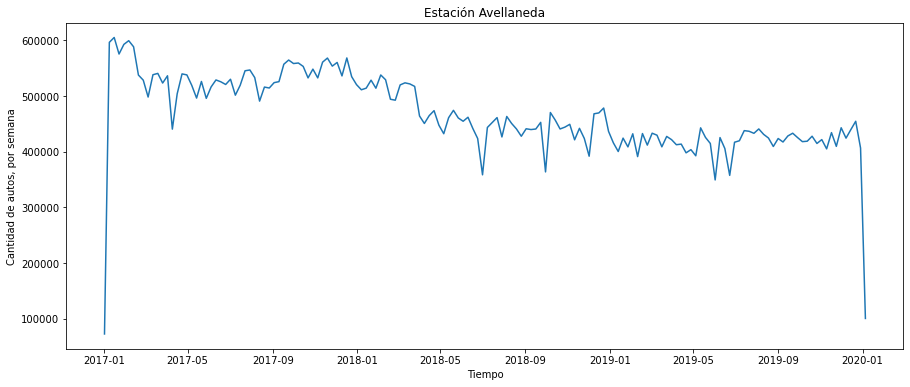

In [14]:
plt.figure(figsize = (15,6))
plt.plot(semanal_n4.index, semanal_n4.cantidad_pasos)
plt.title('Estación Avellaneda')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

result4 = seasonal_decompose(semanal_n4.cantidad_pasos, model='additive')
# result.plot()
# pyplot.show()

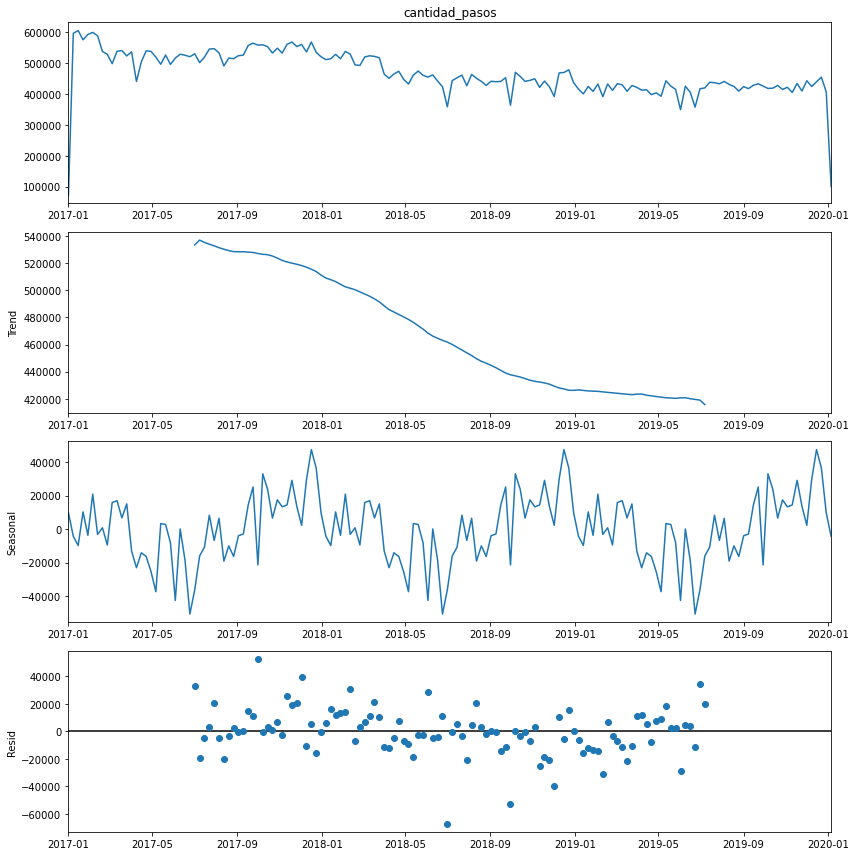

In [16]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result4.plot()
plt.show()

En el caso de las estación Avellaneda, tiene muchos más pasos que la estación Illia, pero sin embargo la tendencia es similar, ambas son claramente decrecientes.

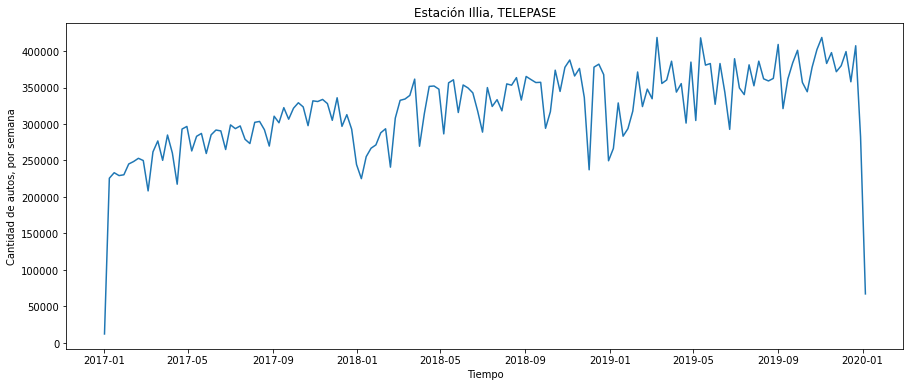

In [17]:
plt.figure(figsize = (15,6))
plt.plot(semanal_n5.index, semanal_n5.cantidad_pasos)
plt.title('Estación Illia, TELEPASE')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result5 = seasonal_decompose(semanal_n5.cantidad_pasos, model='additive')
# result.plot()
# pyplot.show()

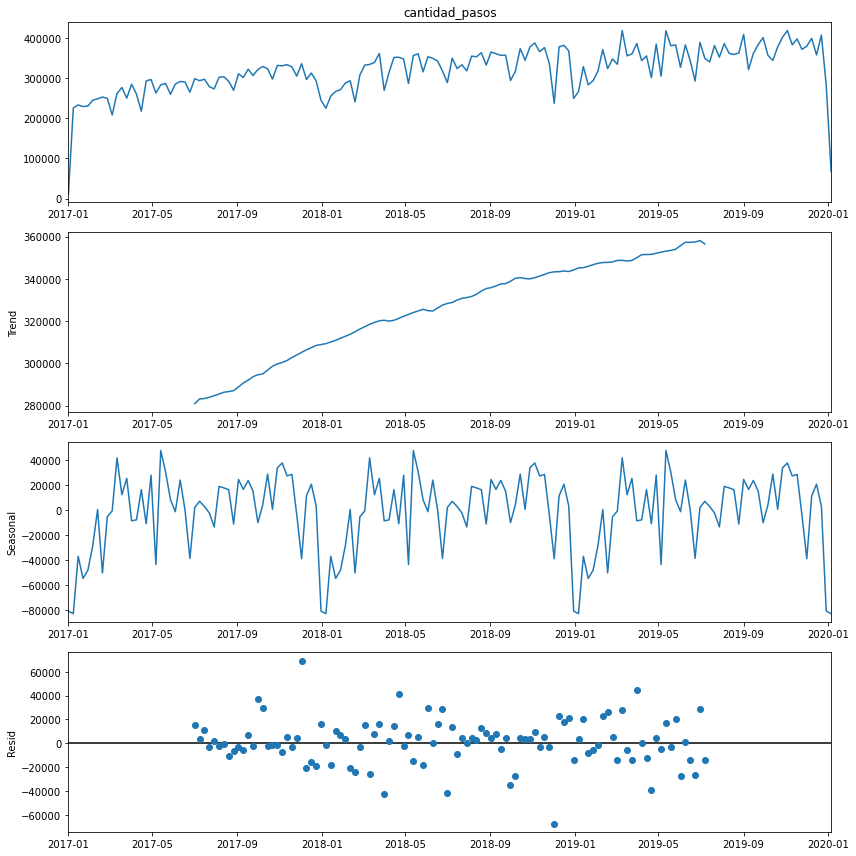

In [19]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result5.plot()
plt.show()

 We see in the case of TELEPASE (this type of payment is like automatic with the vehicle), how the trend differs from what was seen previously, it is the only growing trend that we could see so far, which implies that predicting on this dataset, the results will probably be different.

It would be interesting to be able to try to predict the passage for the TELEPASE, as well as predict the passage for the ALBERTI Station.